<a href="https://colab.research.google.com/github/Cstan1987stat/health-survey-cluster-analysis/blob/main/initial_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# Loading in needed packages.
library(dplyr)
library(ggplot2)
install.packages('cluster')
library(cluster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Preparing data

In [56]:
# Loading in the famd coordiantes csv file.
df <- read.csv("https://raw.githubusercontent.com/Cstan1987stat/health-survey-cluster-analysis/refs/heads/main/famd_coord.csv")

# Extracting the number of rows from df
rows <- dim(df)[1]
# Extracting the number of columns from df
columns <- dim(df)[2]
# Outputing the number of rows and columns
cat('There are', rows,'rows and', columns,'columns in the data.\n')
# Outputing horizontal line for separation purposes
cat('---------------------------------------------------------------------------------------------------\n')
# Outputing blank line
cat('\n')
# Printing the first 6 rows of the data
print(head(df))

There are 20361 rows and 29 columns in the data.
---------------------------------------------------------------------------------------------------

         Dim.1     Dim.2      Dim.3       Dim.4      Dim.5      Dim.6
1  3.118176073  2.339836  1.2605234  2.04569877  0.1779147  1.2731627
2  0.006359897 -1.533622  0.2053232 -0.75406139  0.3295647  0.1308037
3 -0.117218248  1.131204  0.3854460 -1.89763012  0.6574644  1.0566326
4 -0.571682619  1.356402  1.1007619 -1.02514526 -1.2487912  0.7726585
5 -0.387939073 -1.783642 -0.0252481  0.06053259  0.5990237 -0.4145220
6 -0.523127103  2.010015  1.1426708 -0.55226677 -1.2929257  0.6373583
        Dim.7       Dim.8       Dim.9       Dim.10     Dim.11     Dim.12
1  0.33233124 -0.47825149  0.37645884 -0.463259456  0.5645641 -0.8057671
2  0.03991729  0.92134152  0.95314352 -0.427797142  0.7301584  0.5602038
3  0.76083875 -0.26194550 -0.01750296 -0.002773631 -0.5576675  1.5535936
4  0.91556935 -0.24778243 -1.09506793 -2.213519377  2.4414608 -1.514

In [57]:
# Set seed for reproducibility
set.seed(123)
# Grabbing random sample of 5000 rows while selecting the first 20 columns.
df_sample <- df[sample(nrow(df), 5000),seq(1,20,1)]

Revisiting the [FAMD Notebook](https://github.com/Cstan1987stat/health-survey-cluster-analysis/blob/main/notebooks/famd_notebook.ipynb), the first 20 components explained 80% of the variance from the inital data.

### Running Kmeans

**Silhouette Score** – This is the scoring metric we will use. It assigns a value between -1 and 1 to each observation (or row) in our dataset, where a value closer to 1 indicates a well-clustered point and a value closer to -1 indicates a poorly clustered point. The average score across all observations serves as the overall clustering quality metric.

In [74]:
# Create an empty data frame to store clustering results
scoring <- data.frame(clusters = numeric(), silhouette = numeric())

# Loop over cluster counts from 2 to 10
for (c in seq(2, 10, 1)) {
  # Set seed for reproducibility
  set.seed(123)
  # Run k-means with:
  # - c clusters
  # - up to 1000 iterations per run
  # - 25 random starts to find the best solution
  km <- kmeans(df_sample, centers = c, iter.max = 1000, nstart=25)
  # Extract cluster assignments
  clust <- km$cluster
  # Compute silhouette scores
  ss <- silhouette(clust, dist(df_sample))
  # Calculate average silhouette width
  ss_score <- round(mean(ss[, 3]), 4)
  # Add results to the scoring data frame
  new_row <- data.frame(clusters = c, silhouette = ss_score)
  scoring <- rbind(scoring, new_row)
  # Print progress
  cat('Found', c, 'clusters.\n')
  flush.console()
}

Found 2 clusters.
Found 3 clusters.
Found 4 clusters.
Found 5 clusters.
Found 6 clusters.
Found 7 clusters.
Found 8 clusters.
Found 9 clusters.
Found 10 clusters.


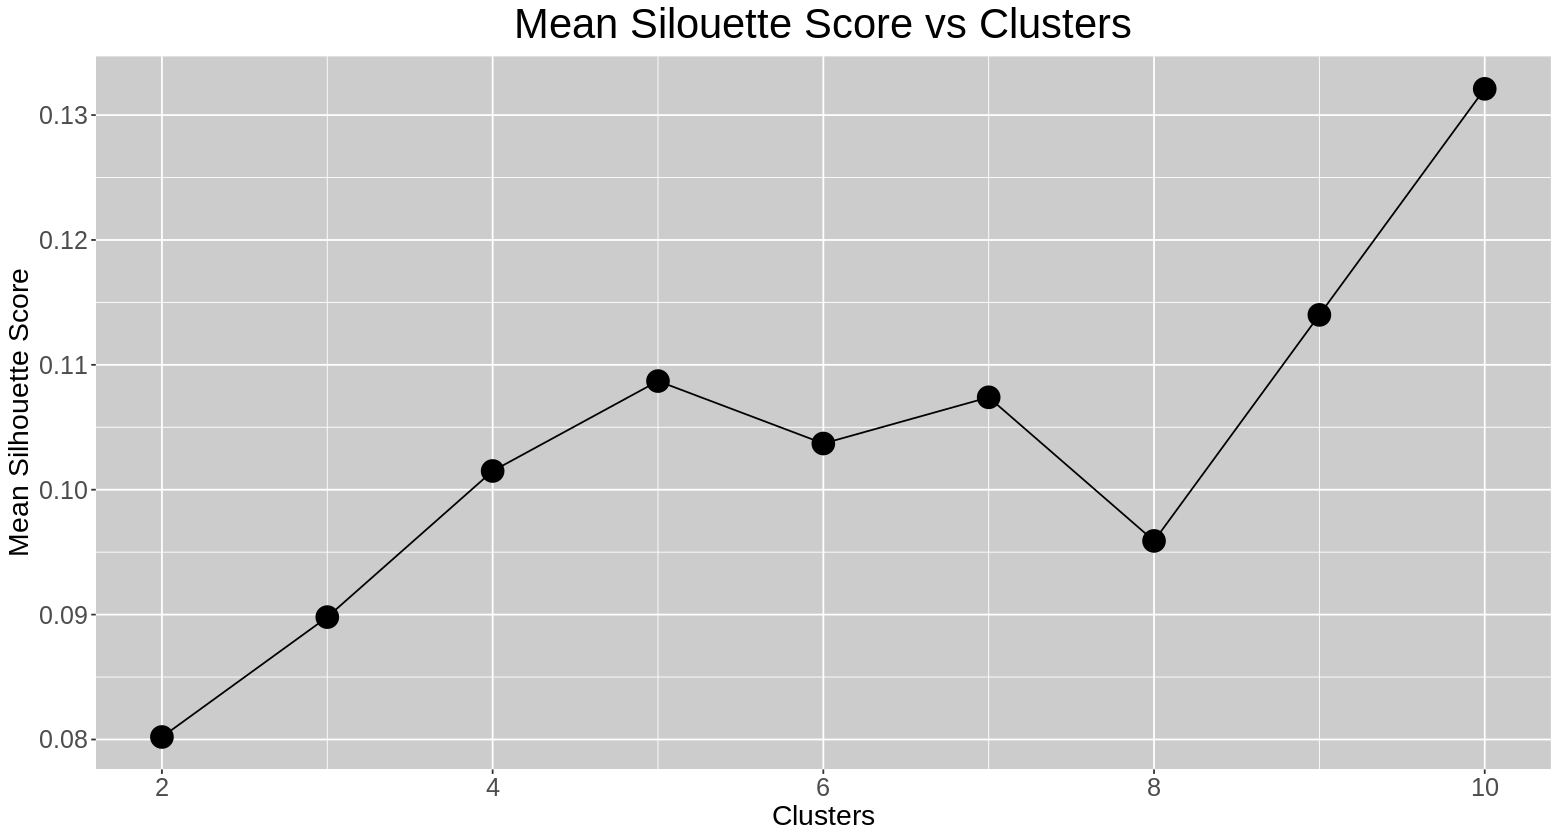

In [75]:
# Resizing plot output
options(repr.plot.width = 13, repr.plot.height = 7)
# Creating line plot with number of clusters on x-axis and silhouette score on y-axis
ggplot(data=scoring, aes(x = clusters, y = silhouette)) +
  geom_line() +
  geom_point(size=6) +
  # Customing the scale of the x-axis
  scale_x_continuous(breaks = seq(2,10,2)) +
  # Customing x-axis and y-axis labels, along with title
  labs(x='Clusters', y='Mean Silhouette Score', title='Mean Silouette Score vs Clusters') +
  # Adjusting text size, text alignment, and panel background color
  theme(axis.text.x = element_text(size=15.2),
        axis.text.y = element_text(size=15),
        axis.title.x = element_text(size=17),
        axis.title.y = element_text(size=17),
        plot.title = element_text(size=25, hjust = 0.5),
        panel.background = element_rect(fill = "gray80"),
        plot.subtitle = element_text(size=12))

The highest mean silhouette score occurs with 10 clusters, followed by 9 clusters, and then 5 clusters.
Since this is the first time I'll doing this sort of machine learning, I'll instead focus on 5 clusters. Furthermore, it'll less overwhelming for the non-technical part of my network when I post my findings on LinkedIn.

### Grabbing original data

In [60]:
# Grabbing original data
orig_data = read.csv('https://raw.githubusercontent.com/Cstan1987stat/health-survey-cluster-analysis/refs/heads/main/adult22_filtered.csv')
# Creating initial_df based off orig_data
initial_df = orig_data
# Converting below columns in the initial_df dataframe to factors with original labels.
initial_df$Sex <- factor(initial_df$Sex, labels=c('Male', 'Female'))
initial_df$Cancer <- factor(initial_df$Cancer, labels=c('Yes','No'))
initial_df$Coronary_heart_disease <- factor(initial_df$Coronary_heart_disease, labels = c('Yes', 'No'))
initial_df$Depression <- factor(initial_df$Depression, labels = c('Yes','No'))
initial_df$Smoked_100_cig <- factor(initial_df$Smoked_100_cig, labels = c('Yes', 'No'))
initial_df$Education <- factor(initial_df$Education, labels = c('1-11', '12th', 'GED', 'High School', 'Some College', 'Assoc Tech', 'Assoc Acad', 'Bach', 'Mast', 'Prof'))
initial_df$Region <- factor(initial_df$Region, labels = c('Northeast', 'Midwest', 'South', 'West'))
initial_df$Anxiety <- factor(initial_df$Anxiety, labels = c('Daily', 'Weekly', 'Monthly', 'Few times Y', 'Never'))
initial_df$`Aerobic.Strength` <- factor(initial_df$`Aerobic.Strength`, labels = c('Neither', 'Strength', 'Aerobic', 'Both'))
# Confirming output is correct
print(head(initial_df))

  Age    Sex Cancer Coronary_heart_disease Depression Smoked_100_cig
1  64   Male    Yes                    Yes         No            Yes
2  37 Female     No                     No         No             No
3  72 Female     No                     No         No             No
4  84 Female     No                     No         No             No
5  31 Female     No                     No         No            Yes
6  81 Female    Yes                     No         No             No
     Education Region     Anxiety Height Weight Sleep_hours Aerobic.Strength
1         Bach  South Few times Y     74    235           8          Aerobic
2         Bach  South     Monthly     69    218           9          Aerobic
3 Some College  South       Never     64    240           8          Neither
4   Assoc Tech  South Few times Y     66    183           8          Neither
5         Bach  South     Monthly     69    156           8             Both
6  High School  South Few times Y     68    170        

### Running Kmeans on the first 20 columns of the whole data

In [76]:
# Set seed for reproducibility
set.seed(123)
# Running kmeans on df with 10 clusters, iter.max set to 1000, and nstart to 25
km <- kmeans(df[,seq(1,20,1)], centers=5, iter.max=1000, nstart=25)
# Adding clusters to initial_df column.
initial_df$clusters <- as.factor(km$cluster)

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1018050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1018050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1018050)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1018050)”


In [77]:
# Exporting data
write.csv(initial_df, 'data_w_5_clusters.csv', row.names = FALSE)